In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn import cluster
from sklearn.cluster import MeanShift
from sklearn.datasets._samples_generator import make_blobs

%matplotlib inline
sns.set()
style.use('ggplot')

In [5]:
centers = [
    [1,1],
    [5,5],
    [3,10]
]
X, _ = make_blobs(n_samples=500, centers=centers, cluster_std=1)

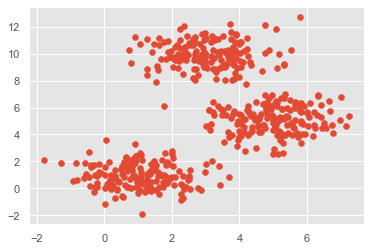

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [14]:
ms = MeanShift()
ms.fit(X)

cluster_centers = ms.cluster_centers_
cluster_centers

array([[4.99448431, 5.10074921],
       [1.08562385, 0.93510195],
       [3.05239339, 9.9193156 ]])

In [11]:
labels = ms.labels_
labels

array([1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 1,
       0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 0,
       0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2,
       1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2,
       2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 2,
       2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2,
       2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0,
       0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0,
       1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1,
       2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2,
       0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2,

In [12]:
n_clusters = len(np.unique(labels))
n_clusters

3

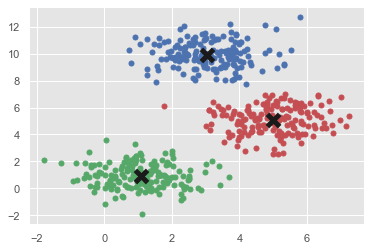

In [15]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color='k', s=150, linewidths=5, zorder=10)
plt.show()

In [16]:
df = pd.read_csv('delivery-crew-report.csv', delimiter="\t")
df

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0
...,...,...,...
3995,3423310685,160.04,10.0
3996,3423312600,176.17,5.0
3997,3423312921,170.91,12.0
3998,3423313630,176.14,5.0


In [23]:
f1 = df['Distance_Feature'].values
f2 = df['Speeding_Feature'].values

In [24]:
X = np.array(list(zip(f1,f2)))

Text(0, 0.5, 'speeding')

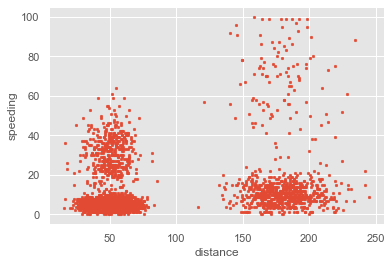

In [25]:
plt.scatter(f1,f2,s=7 )
plt.xlabel('distance')
plt.ylabel('speeding')

In [26]:
df_2_vars = df.drop(['Driver_ID'], axis=1)
data = df_2_vars.values
data

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [27]:
data.shape

(4000, 2)

### Clustering dengan k = 2

In [32]:
k = 4
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(n_clusters=4)

In [47]:
#prediksi
labels = kmeans.predict(data)
labels

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [34]:
Centroids = kmeans.cluster_centers_
C_x = Centroids[:,0]
C_y = Centroids[:,1]

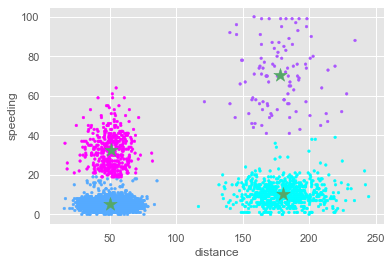

In [36]:
plt.xlabel('distance')
plt.ylabel('speeding')
plt.scatter(f1,f2, c=labels, s=7, cmap=plt.cm.cool)
plt.scatter(C_x, C_y, marker="*", s=200, c="g")

### Clustering dengan mean-shift

In [40]:
ms = MeanShift()
ms.fit(data)
cluster_center = ms.cluster_centers_
cluster_center

array([[ 50.03352564,   7.93141026],
       [179.3323839 ,  10.50309598],
       [176.62831461,  69.82022472]])

In [42]:
labels = ms.labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

In [43]:
n_clusters_ = len(np.unique(labels))

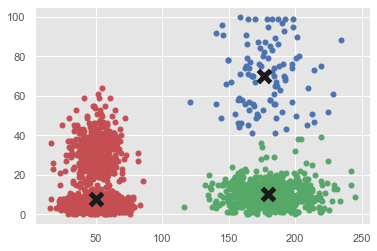

In [46]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize=10)

plt.scatter(cluster_center[:,0], cluster_center[:,1], marker="x", color='k', s=150, linewidths=5, zorder=10)
plt.show()